# Audio data analysis

The sound excerpts are digital audio files in .wav format. Sound waves are digitized by sampling them at discrete intervals known as the sampling rate (typically 44.1kHz for CD-quality audio meaning samples are taken 44,100 times per second).

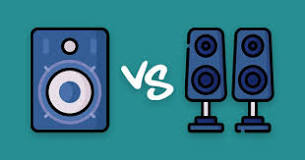   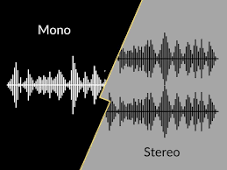

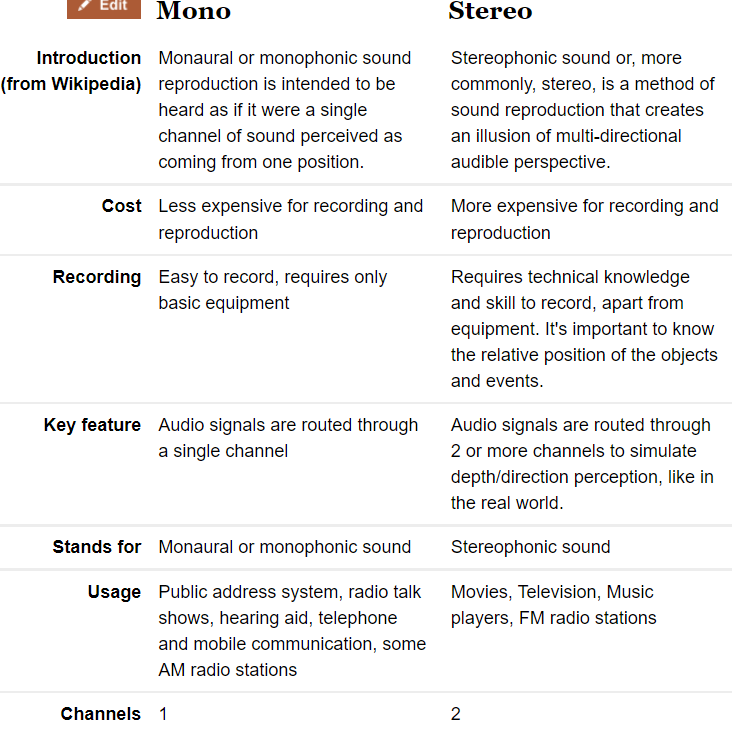

What is Sampling and Sampling frequency?

In signal processing, sampling is the reduction of a continuous signal into a series of discrete values. The sampling frequency or rate is the number of samples taken over some fixed amount of time. A high sampling frequency results in less information loss but higher computational expense, and low sampling frequencies have higher information loss but are fast and cheap to compute.

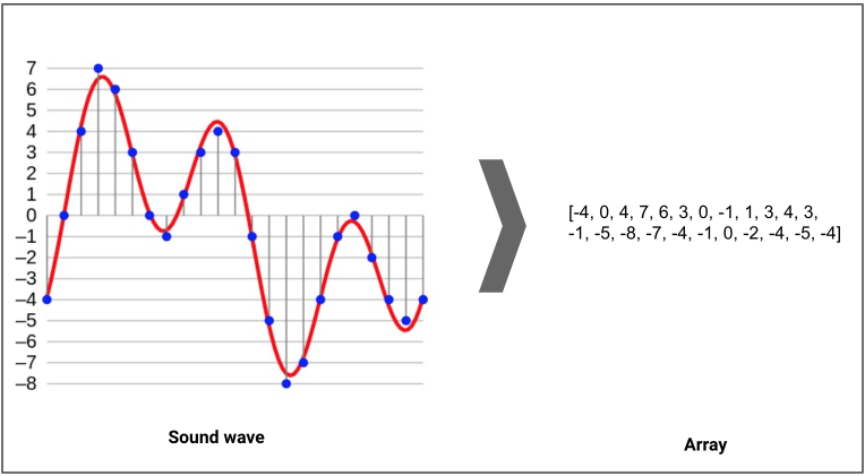

## Audio Data Handling using Python
There are devices built that help you catch these sounds and represent it in a computer-readable format. Examples of these formats are

1. wav (Waveform Audio File) format
2. mp3 (MPEG-1 Audio Layer 3) format
3. WMA (Windows Media Audio) format

# Different libraries used in audio handling
 1. Librosa - 
 this library is used to find the audio data,sample rate , fmcc and many more audio data 
 librosa only uses momo audio data. If the data recieved is sterio then it converts it into mono data(single channel).
 2. IPython.display - 
 This library is used to listen audio data in python shell output,.
 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
filename='UrbanSound8K/dog_bark.wav'

In [ ]:
!pip install IPython

In [29]:
import IPython.display as ipd;
import librosa
import librosa.display

In [10]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is D20F-9239

 Directory of C:\Users\Naman Sharma\Data Science\Audio detection

27-04-2022  19:09    <DIR>          .
26-04-2022  12:05    <DIR>          ..
27-04-2022  12:15    <DIR>          .ipynb_checkpoints
27-04-2022  19:09           342,768 eda and visualisation of audio data.ipynb
27-04-2022  12:15            11,266 SOUND DETECTION PROJECT.ipynb
27-04-2022  19:08    <DIR>          UrbanSound8K
               2 File(s)        354,034 bytes
               4 Dir(s)  82,293,571,584 bytes free


1ST DATA POINT

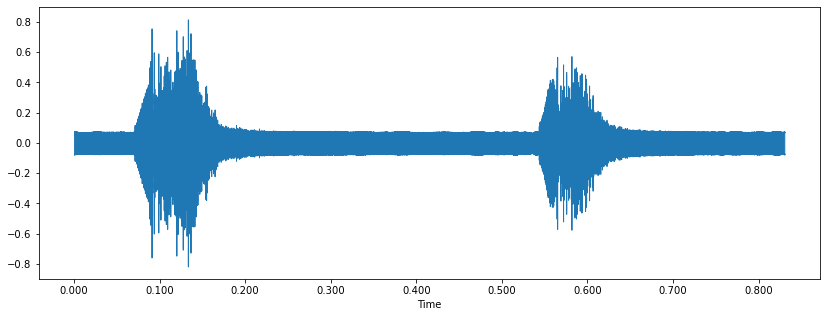

In [32]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

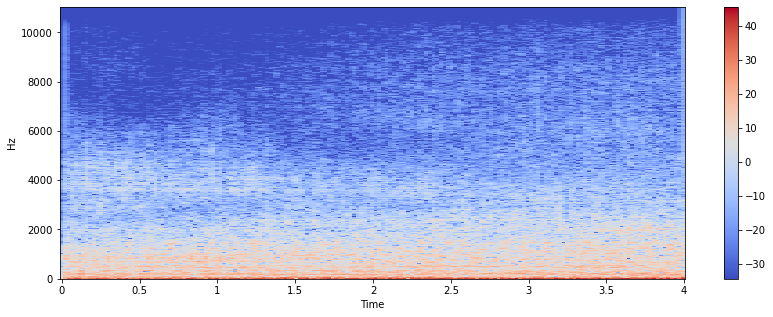

In [38]:
#Spectrobar
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

(40, 173)


<ipython-input-44-6801b04395d1>:1: FutureWarning: Pass y=[0.         0.         0.         ... 0.2961777  0.28840333 0.31345367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, sr=sample_rate,n_mfcc = 40)


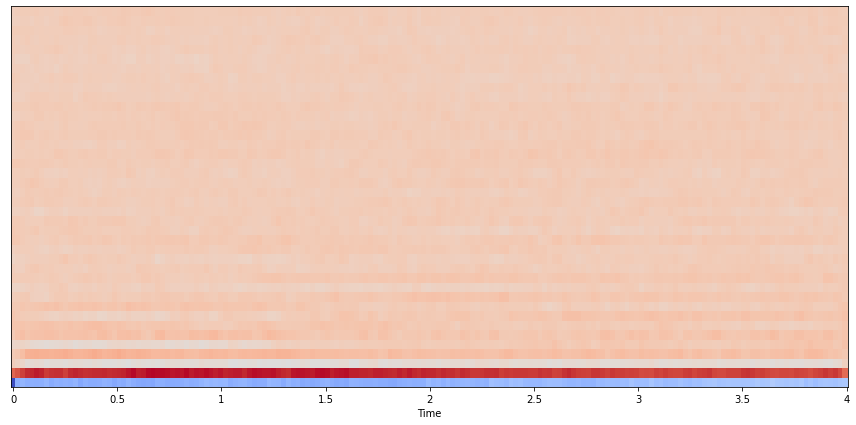

In [44]:
mfccs = librosa.feature.mfcc(data, sr=sample_rate,n_mfcc = 40)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

2ND DATA POINT

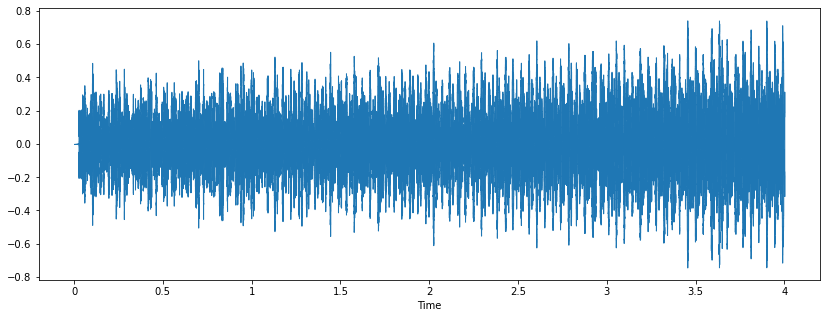

In [33]:
### Sound
filename='UrbanSound8K/drill.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [13]:
sample_rate


22050

## Another library is wavfile imported from scipy.io

scipy operated wiht setrio data ( dual channel data) it is same as librosa but librosa is vastly used than wavefile

In [19]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [20]:
wave_sample_rate

44100

In [21]:
wave_audio

array([2377, 2377, 2371, ..., 2351, 2327, 2313], dtype=int16)

In [22]:
data

array([0.0535574 , 0.07807359, 0.06897732, ..., 0.06880059, 0.07718992,
       0.        ], dtype=float32)

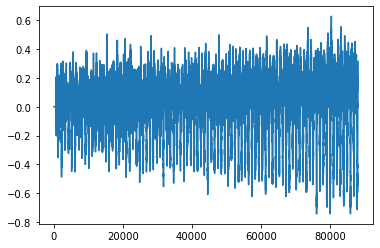

In [34]:
plt.plot(data)

## importing the dataset

In [35]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [36]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
air_conditioner     1000
jackhammer          1000
street_music        1000
drilling            1000
engine_idling       1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64